In [55]:
import json
from google_play_scraper import Sort, reviews_all
from datetime import datetime

In [56]:
class DateTimeEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, datetime):
            return o.isoformat()
        return super().default(o)

In [57]:
result = reviews_all(
    'io.hotdesk.app',
    sleep_milliseconds=0,
    lang='en',
    country='us',
    sort=Sort.MOST_RELEVANT,
)

In [58]:
# Specify the file path where you want to save the results
file_path = 'hotdesk_review.json'

# Write the results to the JSON file using the custom encoder
with open(file_path, 'w', encoding='utf-8') as file:
    json.dump(result, file, ensure_ascii=False, indent=2, cls=DateTimeEncoder)

In [59]:
import pandas as pd

data = pd.read_json(file_path)
data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1e136474-7ab8-4926-83a5-0dbce568272a,Muhammed Khaled,https://play-lh.googleusercontent.com/a/ACg8ocKCxiTMgfz6CCoAnnwlxPuaPwSzE9DHM-T9ibABPgQH=mo,"I like the app design, it's very nice but I would like to see more features like courses or events in each work space, it will be amazing to compare between many work space's courses with details about pricing, instructor and some information about the course.",3,2,2.63.13,2023-05-13T07:47:10,"Thank you very much for your feedback, we have passed it through to our growth team and will ensure to keep you posted once this is live.",2023-05-15T13:34:00,2.63.13
1,67d99087-3262-46c8-9b4e-1b2098b56b74,Bill Jefferson,https://play-lh.googleusercontent.com/a/ACg8ocIx6HaCZC6GOvIfeQelI2yfiF6dSp_majPKzSDJy0ZKeCc=mo,Dont like that i have to enter in my credit card details to book a space. Make it so that I need to do it when the booking is accepted. Nobody is going to trust a rather unknown app with their payment details.,3,16,1.9.15,2022-09-05T11:37:57,"Hi Bill\n\nThank you for your feedback. Our payment provider is stripe, so rest assured your details are secure. We also put hold on the booking value when you request a booking but we do not actually capture till booking is confirmed and cancellation period is over.\n\nLet us know if you need any details from our end.",2022-09-05T11:40:30,1.9.15
2,82ba088b-4074-4d2c-af61-9ffe5fd6d5b4,A. M.,https://play-lh.googleusercontent.com/a/ACg8ocKerzd7dblzoUOVwbwVhEHkCpYNkrCNGna78vFMIpkM=mo,"Shi**y app. Booked an office a week ahead of time, was informed that someone would call me to follow up and tell me next steps. A week later, no calls, no emails, nothing!! The booking was supposed to be for today, but here I am, nobody called, no follow up emails.... Nothing!! Waste of time! 100% unrecommended!!",1,29,1.8.516,2022-03-27T16:39:35,"We are very sorry for the inconvenience. We'd be happy to take a look into this for you, please contact us at help@hotdesk.io.",2022-04-13T01:35:39,1.8.516
3,aaf423e4-09c6-422d-af37-cfa154c128b3,K Mostafa,https://play-lh.googleusercontent.com/a/ACg8ocIWRT24iF6N3tPEd3c8X-2gsGrdfsynIiJndbx_LecI=mo,"Very good app to find nearby co working spaces but I have an ""issue"" with back button when i select the space on the map and try to go back it exit from the app other than that it is amazing",4,14,1.8.516,2022-03-23T02:36:36,None,None,1.8.516
4,7e55d189-dfdc-40d0-a0ed-347baf4b7bb8,Muham mad,https://play-lh.googleusercontent.com/a-/ALV-UjWQgL6bWLwoXOZvMikRwwp9kWeNvZoANMy40JyPdeVRwA,"Not recommend at all to download. A lot of bugs and difficulties will face you during your signing. Also, you will be able to sign up or sign in.",1,8,1.9.50,2022-11-19T03:19:43,We are sorry if you have faced issues with the app. Please email us at help@hotdesk.io and we will be happy to assist or report a bug using this form https://forms.gle/KxBH3nqfvoQ23r1T8,2022-11-19T03:25:38,1.9.50


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              68 non-null     object
 1   userName              68 non-null     object
 2   userImage             68 non-null     object
 3   content               68 non-null     object
 4   score                 68 non-null     int64 
 5   thumbsUpCount         68 non-null     int64 
 6   reviewCreatedVersion  59 non-null     object
 7   at                    68 non-null     object
 8   replyContent          48 non-null     object
 9   repliedAt             48 non-null     object
 10  appVersion            59 non-null     object
dtypes: int64(2), object(9)
memory usage: 6.0+ KB


In [61]:
data.drop(columns=[
    'reviewId',
    'userImage',
    'userName',
    'replyContent',
    'repliedAt',
    'appVersion'
], inplace=True)

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               68 non-null     object
 1   score                 68 non-null     int64 
 2   thumbsUpCount         68 non-null     int64 
 3   reviewCreatedVersion  59 non-null     object
 4   at                    68 non-null     object
dtypes: int64(2), object(3)
memory usage: 2.8+ KB


In [63]:
data.reset_index(inplace=True)
data.head()

,index,content,score,thumbsUpCount,reviewCreatedVersion,at
0,0,"I like the app design, it's very nice but I would like to see more features like courses or events in each work space, it will be amazing to compare between many work space's courses with details about pricing, instructor and some information about the course.",3,2,2.63.13,2023-05-13T07:47:10
1,1,Dont like that i have to enter in my credit card details to book a space. Make it so that I need to do it when the booking is accepted. Nobody is going to trust a rather unknown app with their payment details.,3,16,1.9.15,2022-09-05T11:37:57
2,2,"Shi**y app. Booked an office a week ahead of time, was informed that someone would call me to follow up and tell me next steps. A week later, no calls, no emails, nothing!! The booking was supposed to be for today, but here I am, nobody called, no follow up emails.... Nothing!! Waste of time! 100% unrecommended!!",1,29,1.8.516,2022-03-27T16:39:35
3,3,"Very good app to find nearby co working spaces but I have an ""issue"" with back button when i select the space on the map and try to go back it exit from the app other than that it is amazing",4,14,1.8.516,2022-03-23T02:36:36
4,4,"Not recommend at all to download. A lot of bugs and difficulties will face you during your signing. Also, you will be able to sign up or sign in.",1,8,1.9.50,2022-11-19T03:19:43


In [64]:
rating_df = data.groupby(by='score').agg({
    'index': 'nunique'
}).reset_index()

rating_df.head()

,score,index
0,1,29
1,2,1
2,3,2
3,4,2
4,5,34


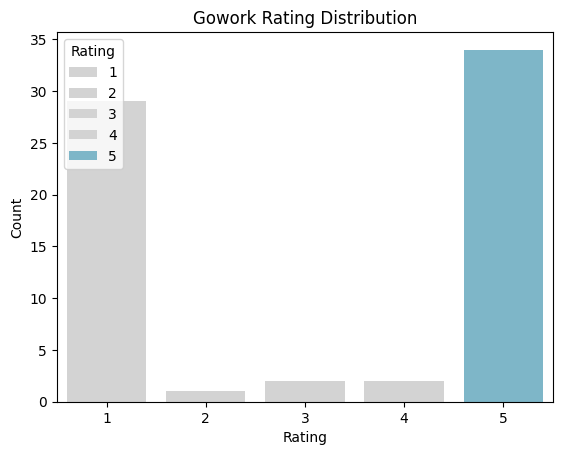

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'score' column in your DataFrame represents the ratings
labels = rating_df['score']
sizes = rating_df['index']

colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#72BCD4"]
# Create a bar plot using seaborn
sns.barplot(x=labels, y=sizes, palette=colors, hue=labels)

# Adding a title
plt.title('Gowork Rating Distribution')
plt.ylabel('Count')
plt.xlabel('Rating')
plt.legend(title='Rating', loc='upper left')

# Display the bar plot
plt.show()


In [66]:
pd.set_option('display.max_colwidth', None)
data.sort_values(by='thumbsUpCount', ascending=False)

most_thumbs_df = data[['content', 'score', 'thumbsUpCount']].sort_values(by='thumbsUpCount', ascending=False)

most_thumbs_df[most_thumbs_df.thumbsUpCount != 0].head(10)

,content,score,thumbsUpCount
6,Amazing app with amazing team. Really wonderful experience. Had an issue in my booking yet they deltbwith very high professionalism. Strongly recommended,5,44
10,Great app that effectively finds all co-working spaces wherever I am. Solid app for location independent workers.,5,31
2,"Shi**y app. Booked an office a week ahead of time, was informed that someone would call me to follow up and tell me next steps. A week later, no calls, no emails, nothing!! The booking was supposed to be for today, but here I am, nobody called, no follow up emails.... Nothing!! Waste of time! 100% unrecommended!!",1,29
1,Dont like that i have to enter in my credit card details to book a space. Make it so that I need to do it when the booking is accepted. Nobody is going to trust a rather unknown app with their payment details.,3,16
3,"Very good app to find nearby co working spaces but I have an ""issue"" with back button when i select the space on the map and try to go back it exit from the app other than that it is amazing",4,14
26,very creative & exceptional advertise 🥰👏👌,5,11
8,"I think when I want to go to somewhere, I can find place, now it's very greatful chance to use this app for that. Very simple and easy to use for rent.",5,9
4,"Not recommend at all to download. A lot of bugs and difficulties will face you during your signing. Also, you will be able to sign up or sign in.",1,8
17,"Can't register. I keep getting a message ""Socket Operation Failed""",1,8
5,"It was pretty smooth actually, the follow up was amazing after each step. Was kinda surprised even after the meeting was over i received a call requesting a feedback!! Definitely recommend 👍👍",5,7


In [71]:
lowest_score_df = most_thumbs_df.sort_values(by='score', ascending=True)
lowest_score_df[lowest_score_df.score <= 3]

,content,score,thumbsUpCount
23,"I cant open without update , and i cant update !",1,2
34,Very bad user experience,1,2
20,The worst ever Taking a very long time to open !!!!,1,2
62,برنامج فاشل ولا له فائدة مسحته,1,2
31,Doesn't even load,1,2
60,سى جداااا وكدب لا حد يحمله,1,2
58,اقطر تطبيق مضلل وكداب,1,2
57,Useless,1,2
39,Can't registrar,1,2
56,trash,1,2


In [67]:
from collections import Counter
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
# Apply split() to each cell in the 'content' column
split_it = most_thumbs_df['content'].apply(lambda x: x.split())

# Flatten the list of lists
flat_list = [word for sublist in split_it for word in sublist]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in flat_list if word.lower() not in stop_words]

# Use Counter to count occurrences of each word
word_counter = Counter(filtered_words)

# Get the most common words
most_occur = word_counter.most_common()
most_occur_df = pd.DataFrame(most_occur, columns=['Word', 'Count'])
most_occur_df.head(20)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mbint\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Word,Count
0,app,14
1,Great,6
2,like,6
3,use,6
4,bad,6
5,spaces,5
6,Can't,5
7,و,5
8,time,5
9,experience,5


In [68]:
version_score_df = data.groupby(by=['reviewCreatedVersion']).agg({
    'score': 'mean',
    'index': 'nunique'
}).sort_values(by=['reviewCreatedVersion', 'score'], ascending=False)

version_score_df

,score,index
reviewCreatedVersion,,
2.73.22,1.000000,1
2.66.10,5.000000,1
2.65.16,1.800000,5
2.63.13,2.000000,2
2.60.9,1.000000,1
1.9.58,3.000000,2
1.9.50,3.285714,7
1.9.15,3.571429,7
1.9.00,5.000000,8
